# **1. Import Library**

Pada tahap ini, saya perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# **2. Memuat Dataset**

Pada tahap ini, saya perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, kita bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan untuk menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
file_path = 'fundamentals.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris awal dataset
print(data.head())

   Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0         -1.888000e+09     4.695000e+09        53.0  ...   
1         -3.114000e+09     1.059200e+10        75.0  ...   
2         -5.311000e+09

# **3. Exploratory Data Analysis (EDA)**

Pada tahap ini, saya akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Informasi Dataset
print("Info Dataset:")
print(data.info())

# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1

In [ ]:
# Mengecek Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# Menangani Missing Values
# Contoh: Mengisi missing values dengan median untuk numerikal dan modus untuk kategorikal
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            data[column].fillna(data[column].median(), inplace=True)

# Verifikasi Tidak Ada Missing Values
print("\nMissing Values Setelah Penanganan:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

Missing Values Setelah Penanganan:
Unnamed: 0                      0
Ticker Symbol                   0
Period Ending                   0
Accounts Payable                0
Accounts Receivable             0
                               ..
Total Revenue                   0
Treasury Stock                  0
For Year                        0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 79, dtype: int64


<ipython-input-20-8580f0f5d8be>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)



Kolom Kategorikal: ['Ticker Symbol', 'Period Ending']
Kolom Numerikal: ['Unnamed: 0', 'Accounts Payable', 'Accounts Receivable', "Add'l income/expense items", 'After Tax ROE', 'Capital Expenditures', 'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks', 'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges', 'Depreciation', 'Earnings Before Interest and Tax', 'Earnings Before Tax', 'Effect of Exchange Rate', 'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets', 'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax', 'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments', 'Liabilities', 'Long-Term Debt', 'Long-Term Investments', 'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing', 'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments', 'Net Income Applicable to Common Shareholders', 'Net I

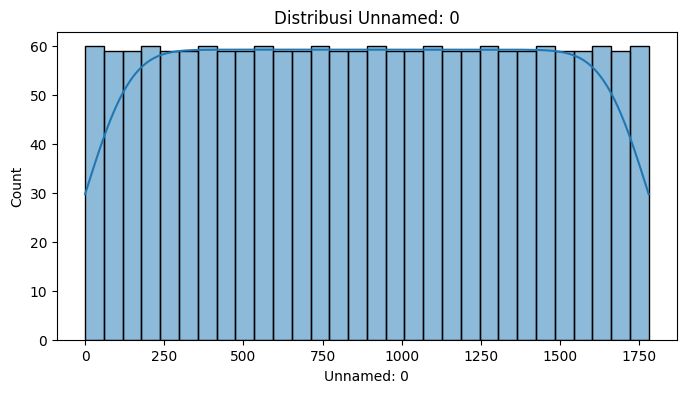

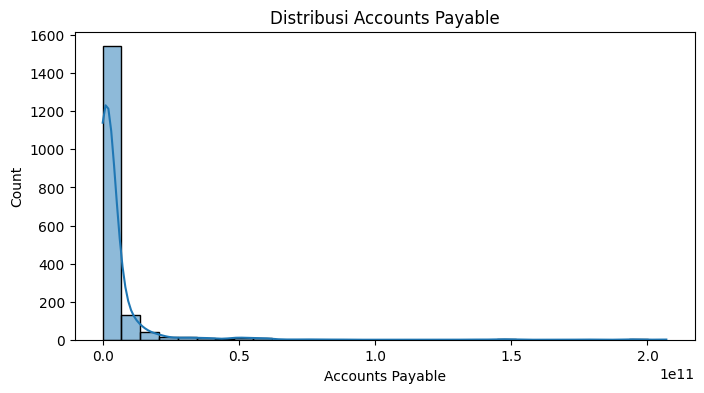

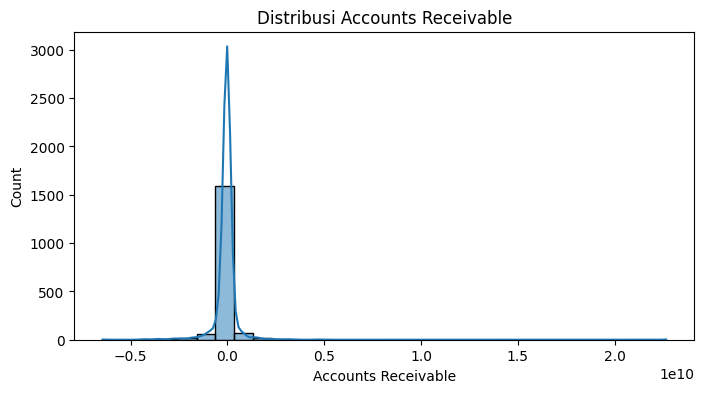

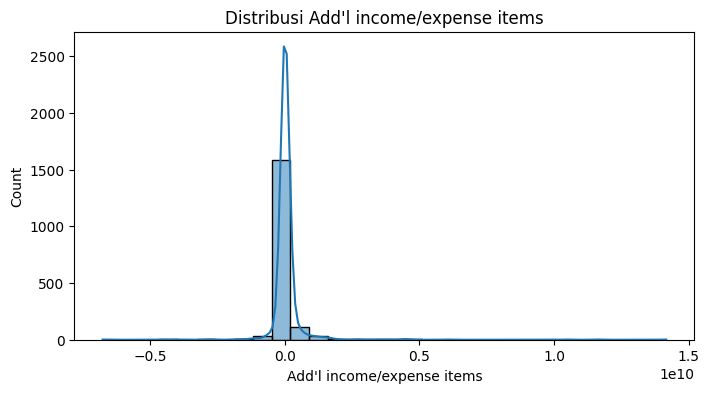

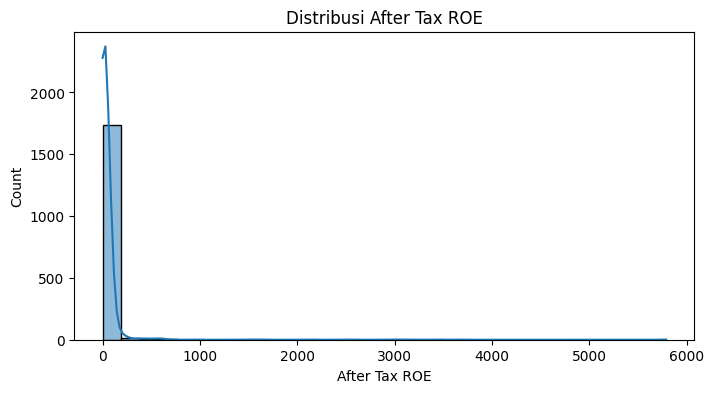

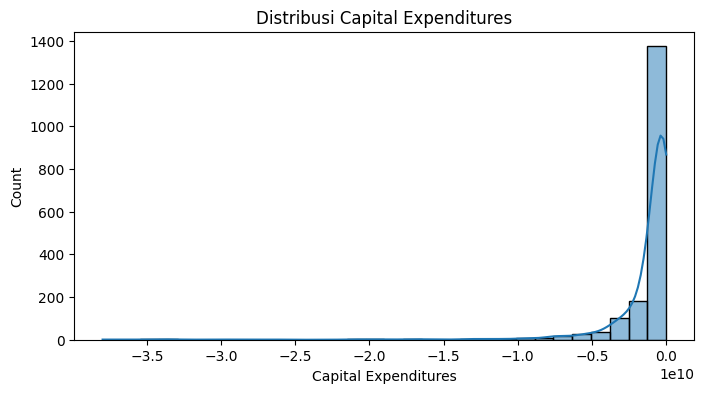

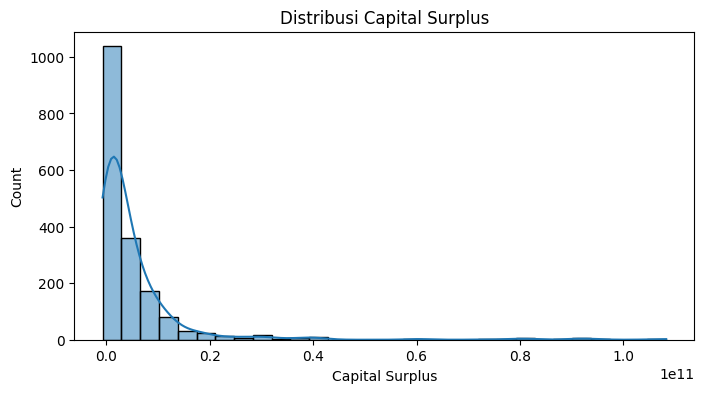

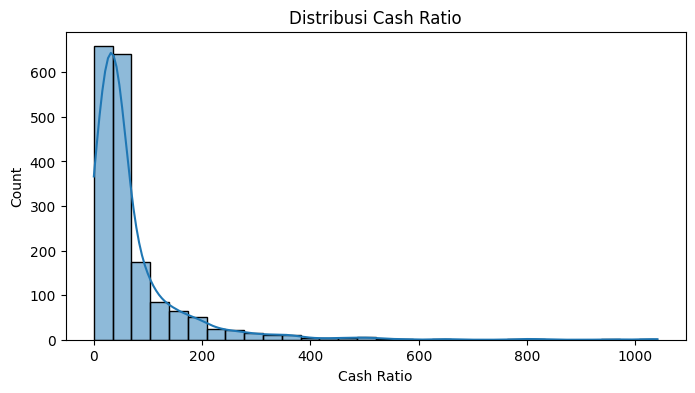

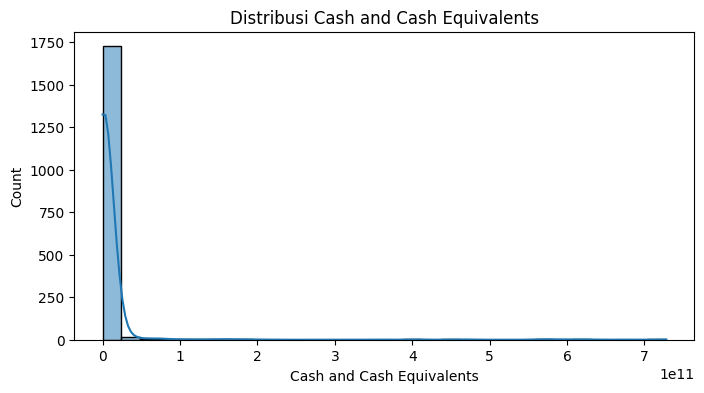

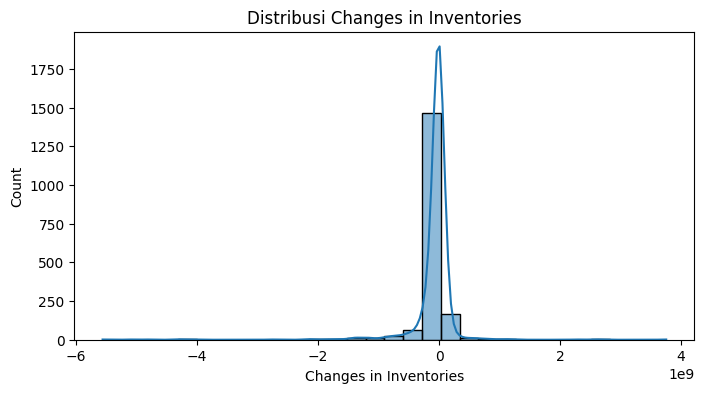

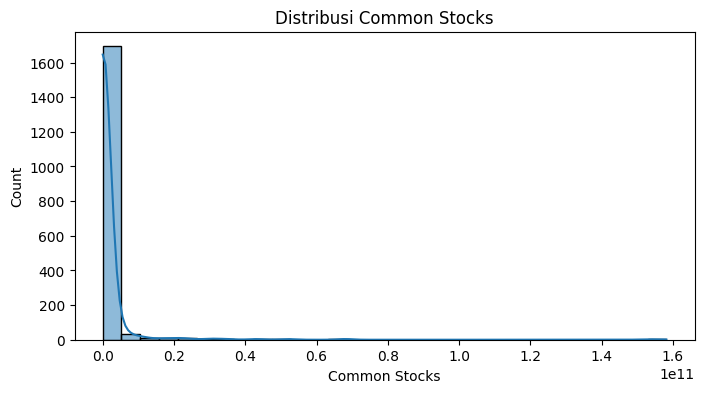

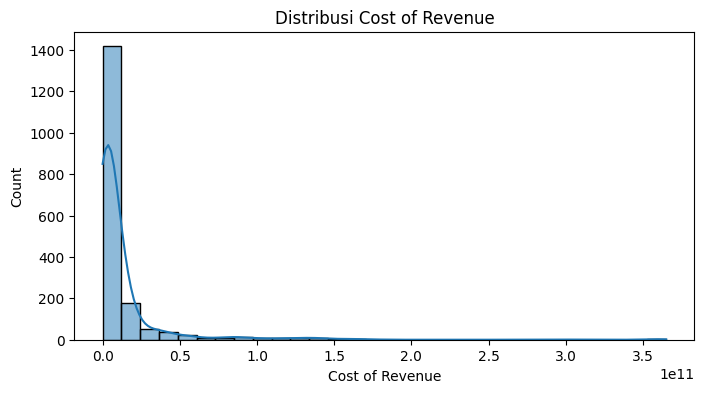

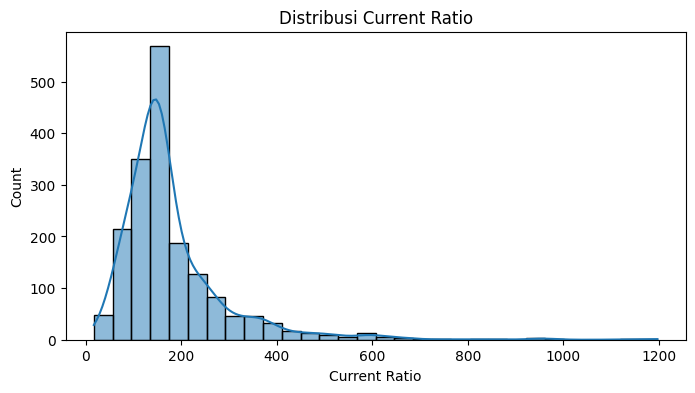

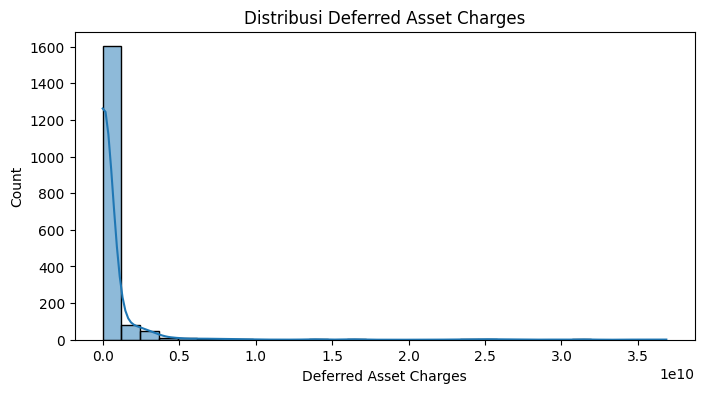

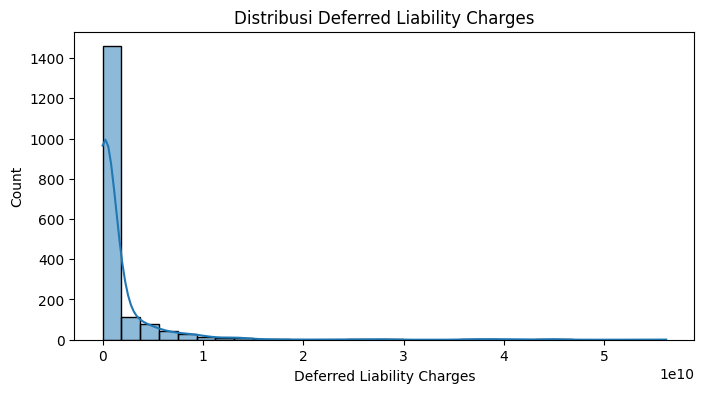

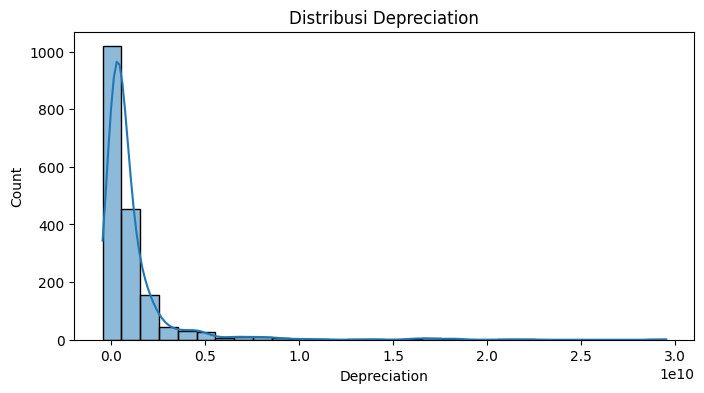

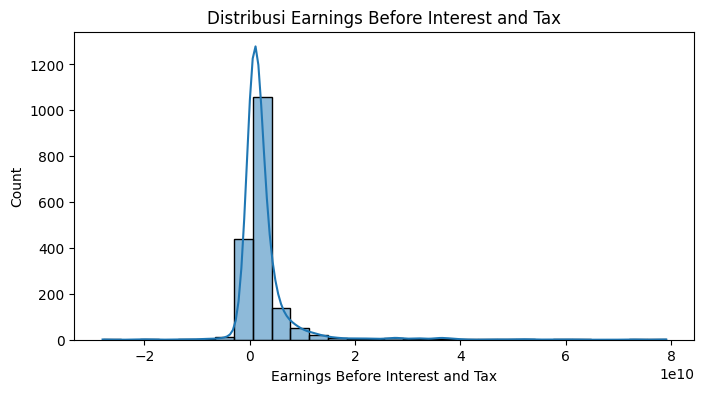

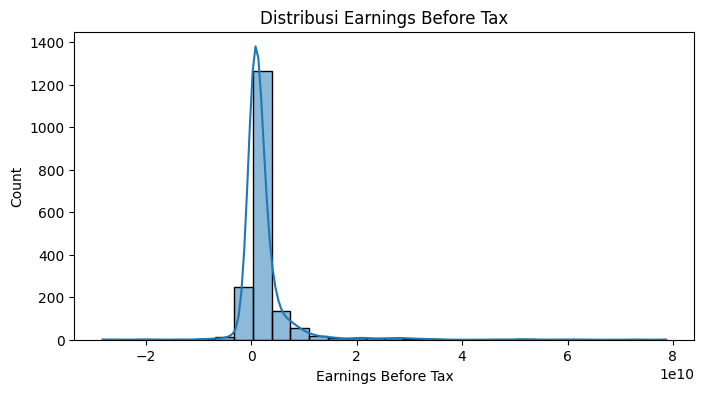

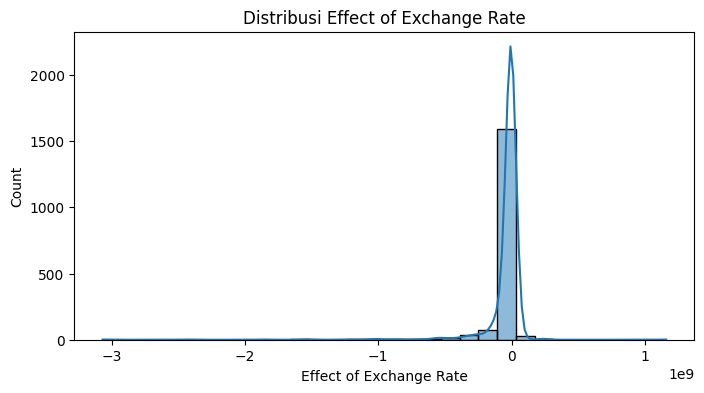

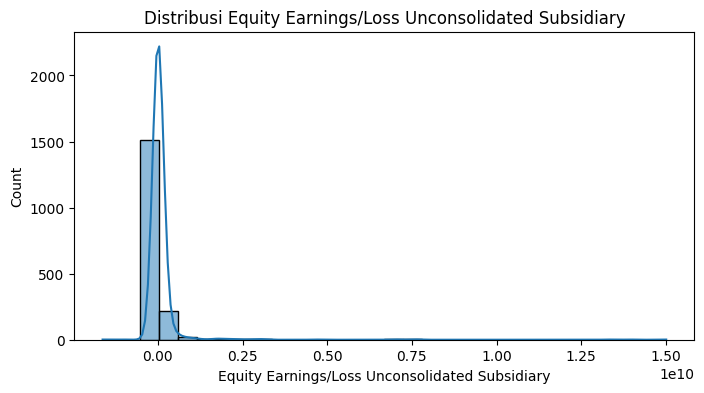

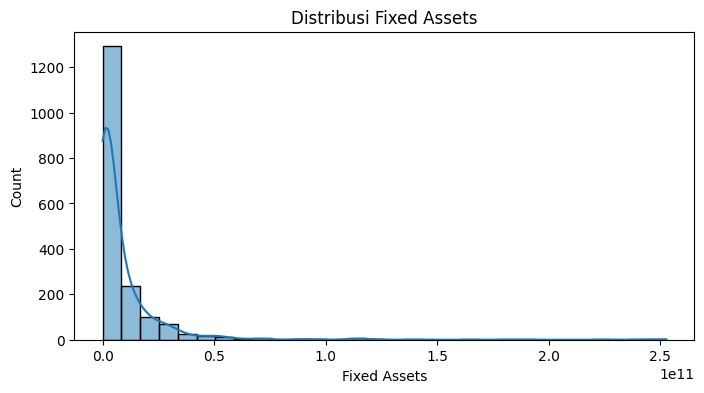

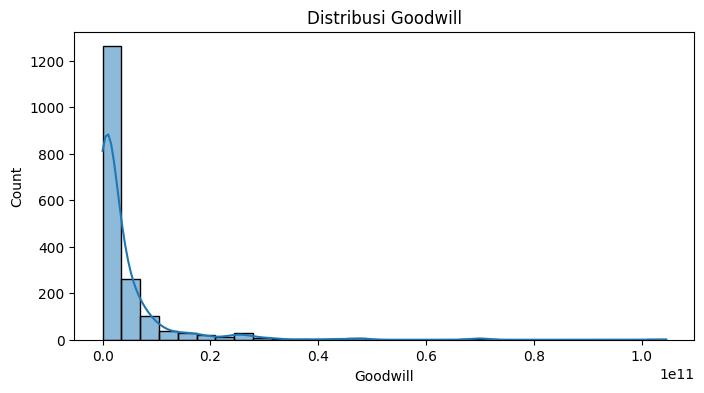

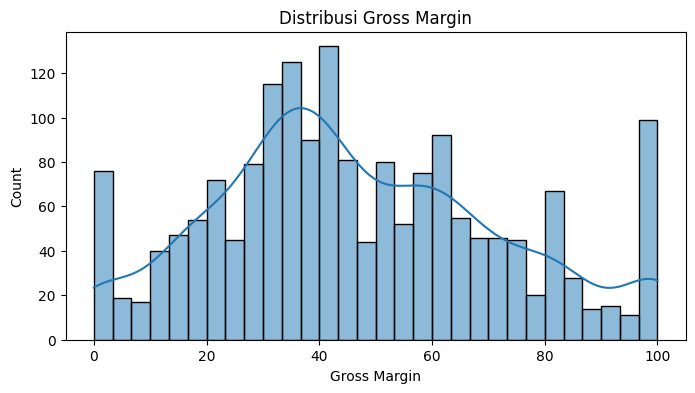

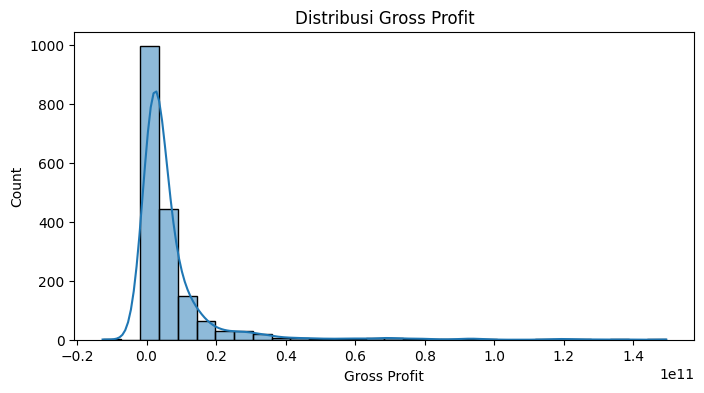

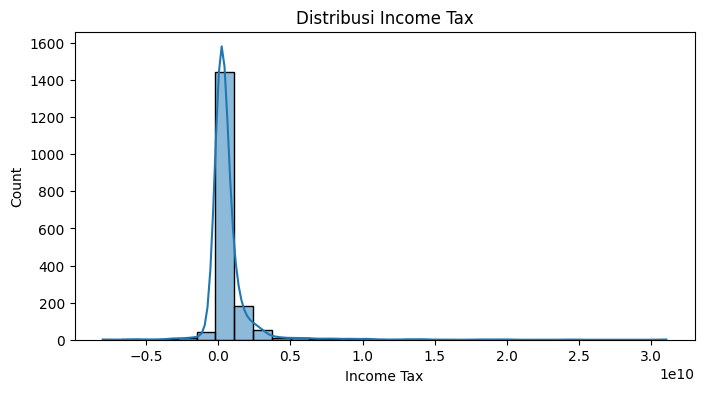

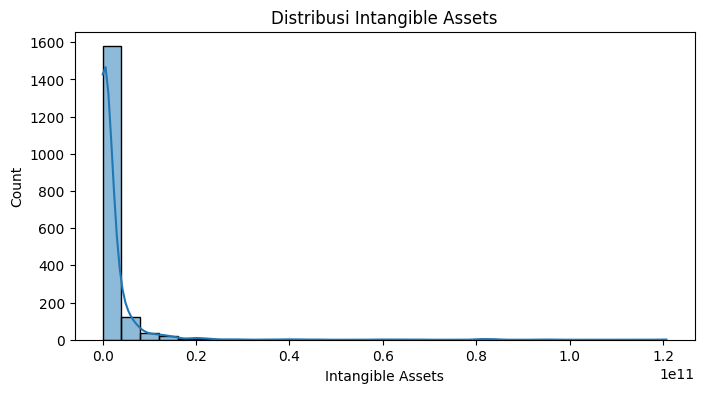

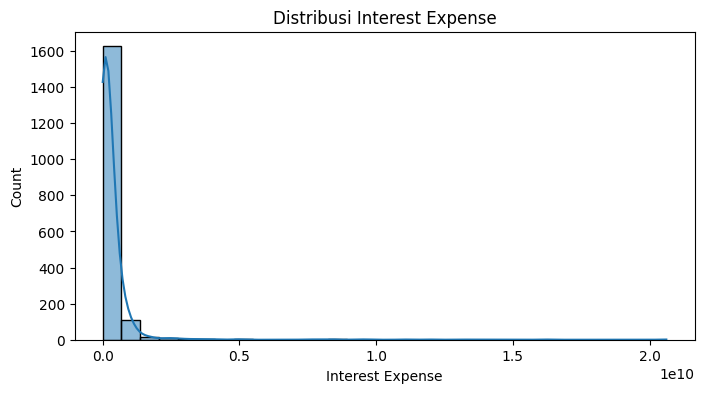

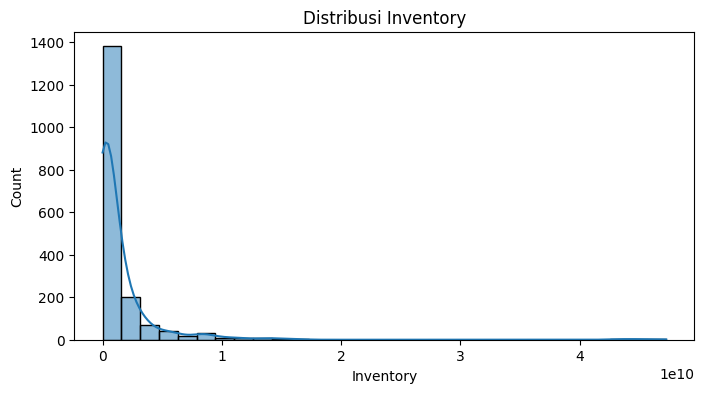

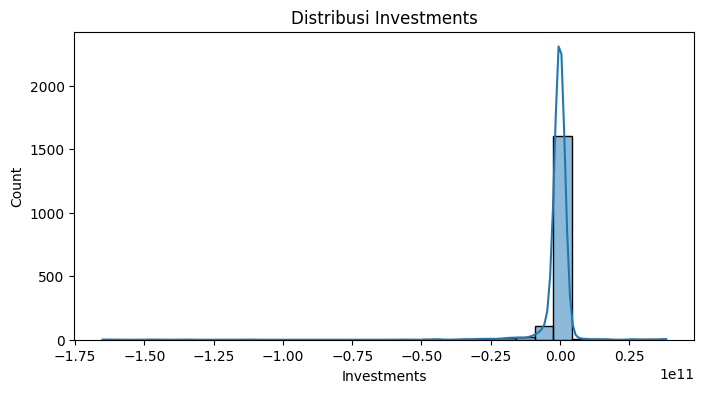

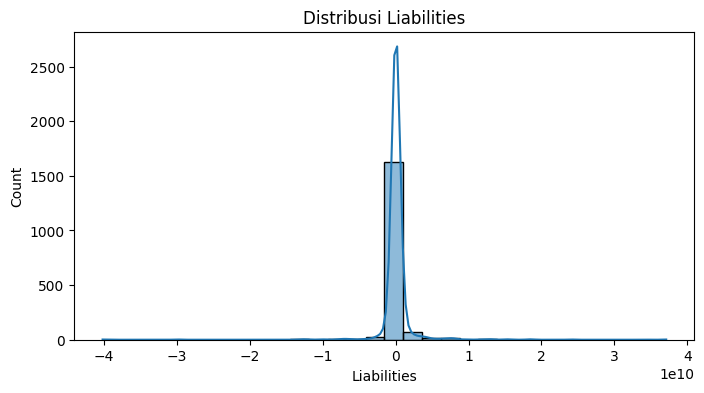

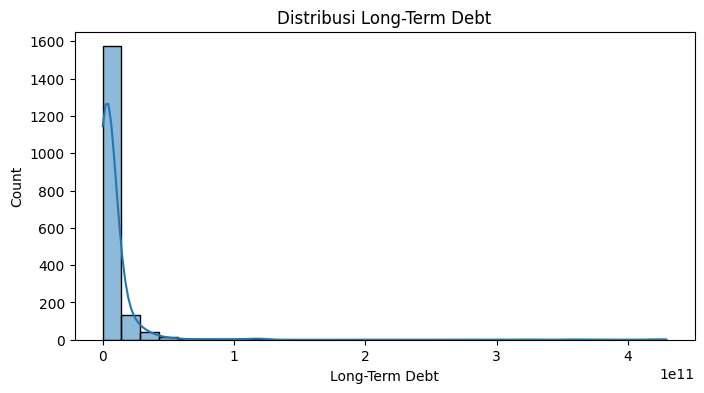

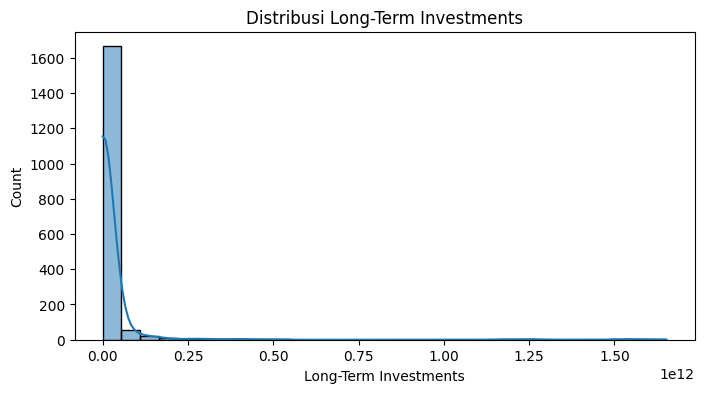

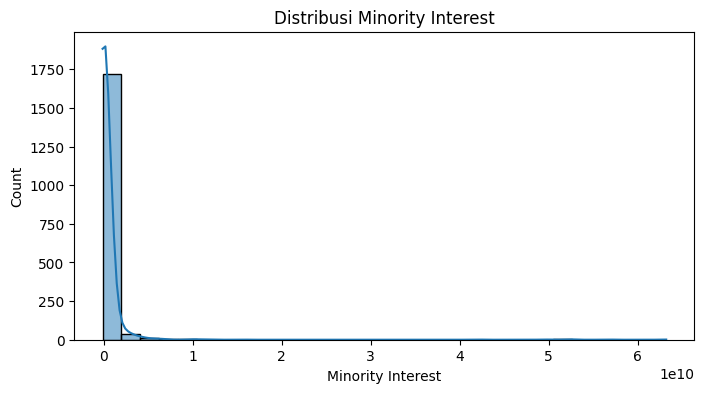

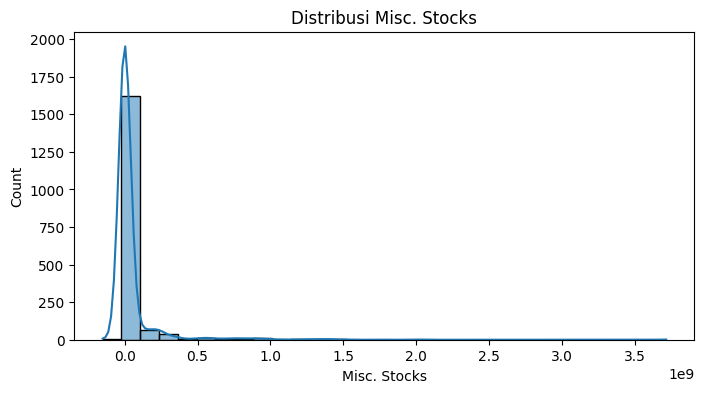

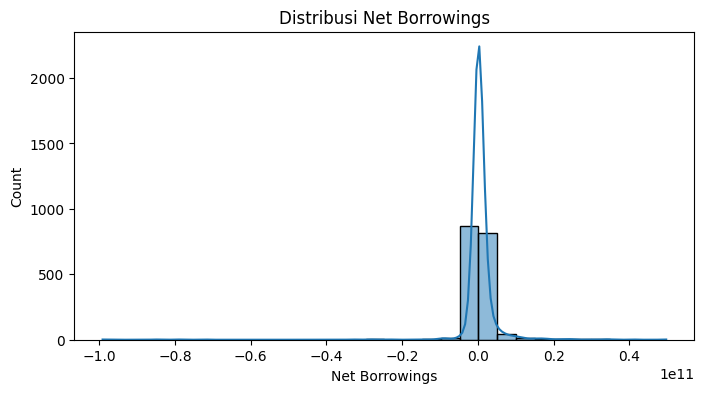

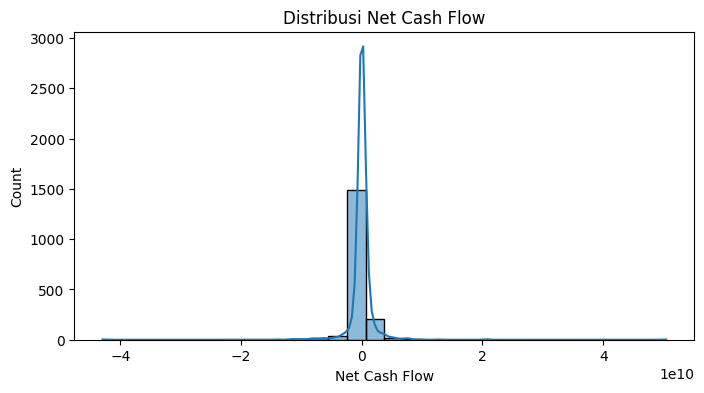

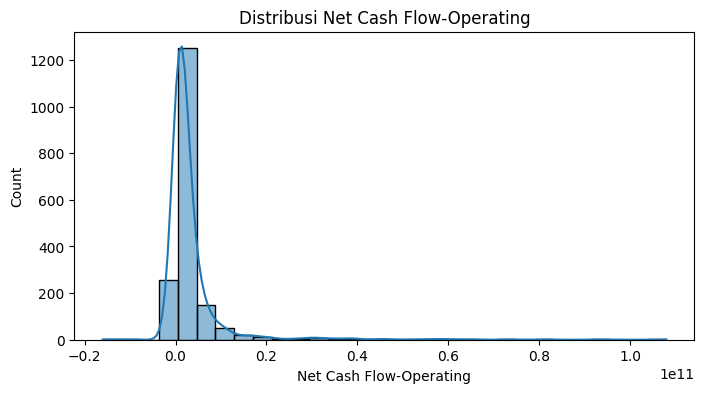

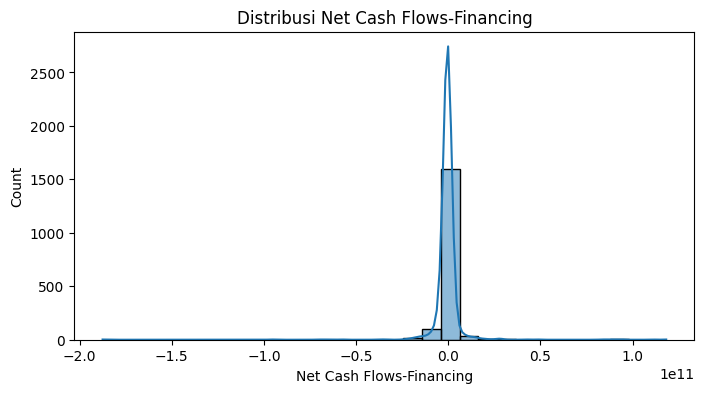

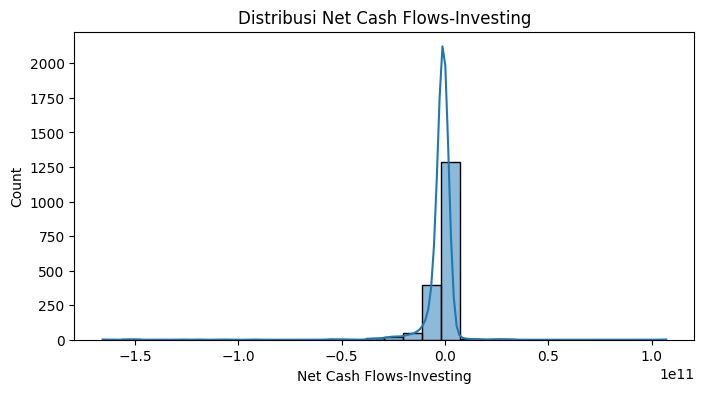

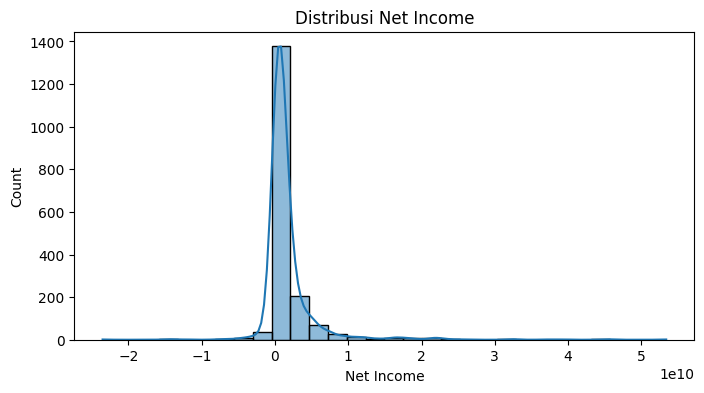

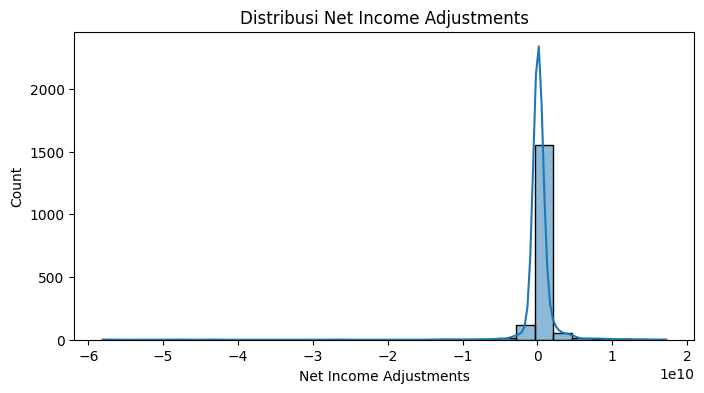

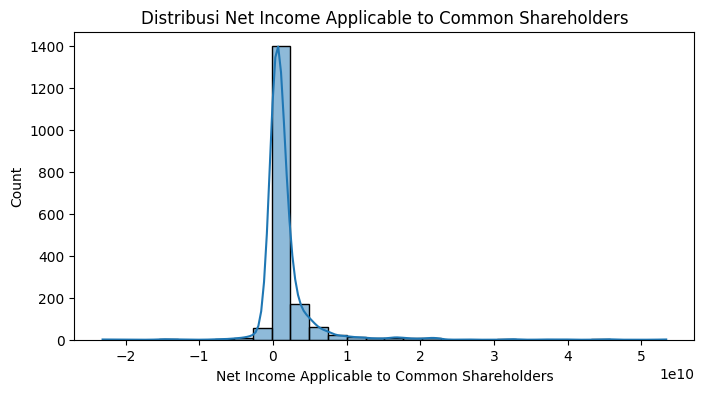

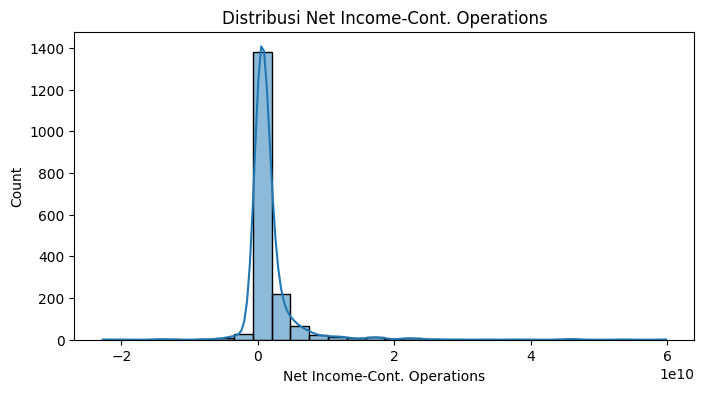

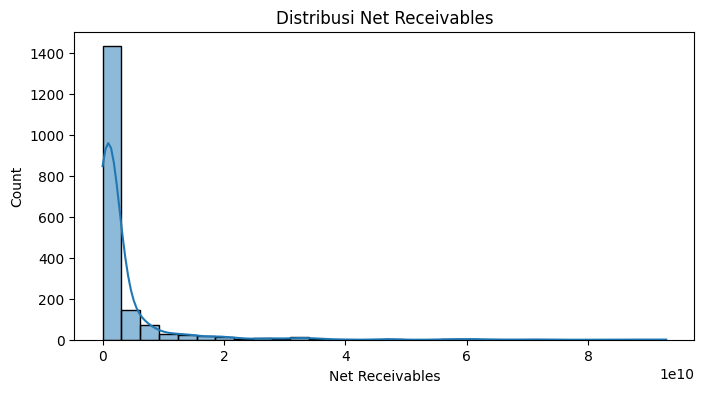

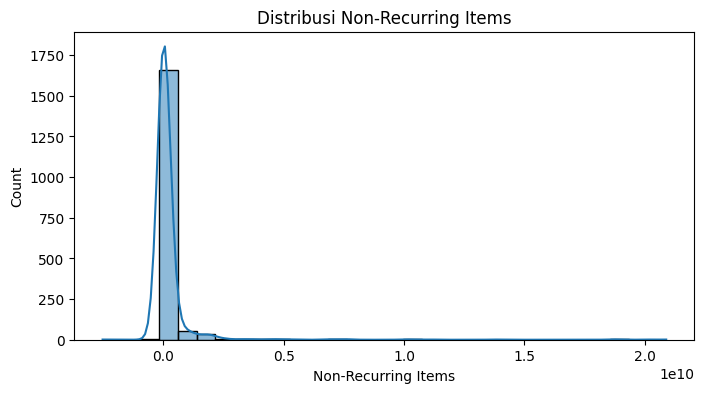

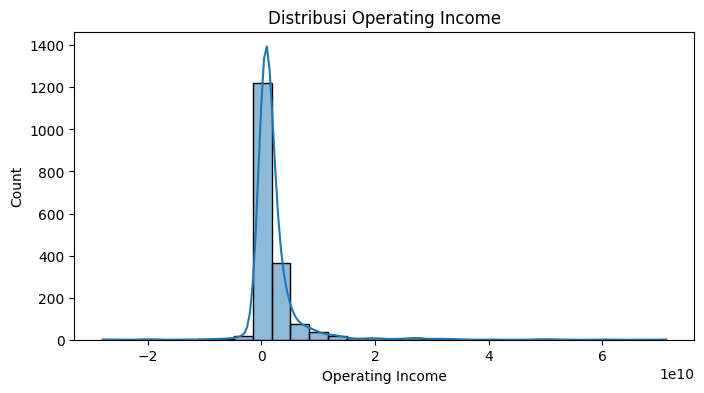

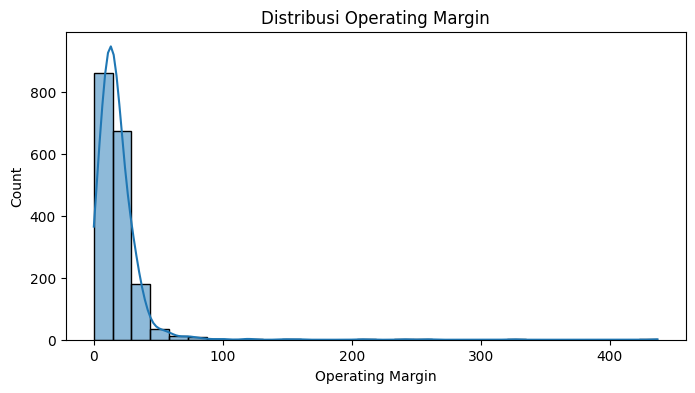

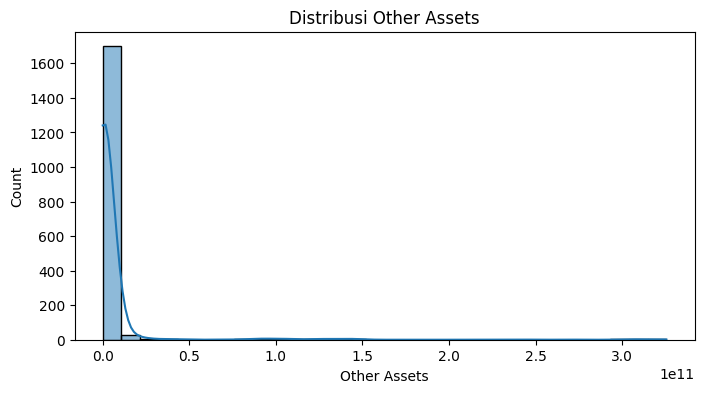

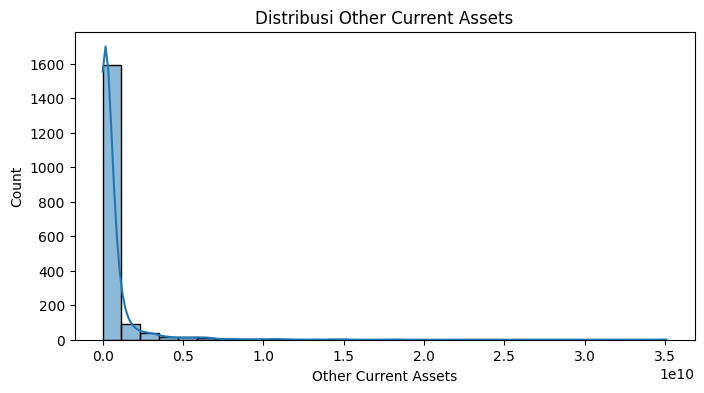

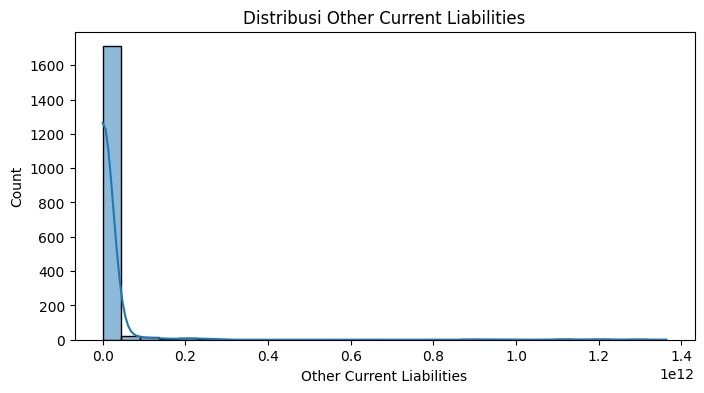

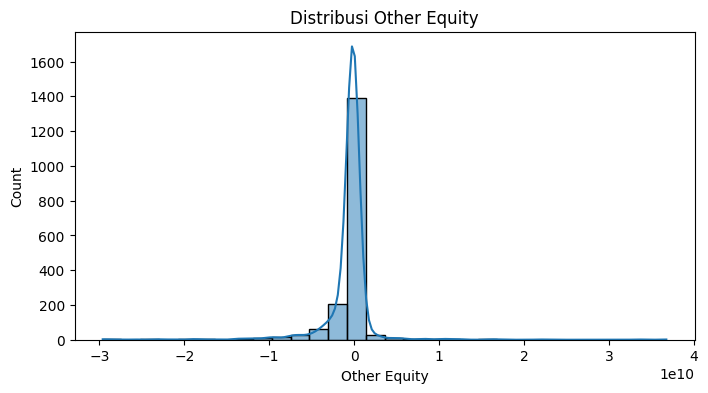

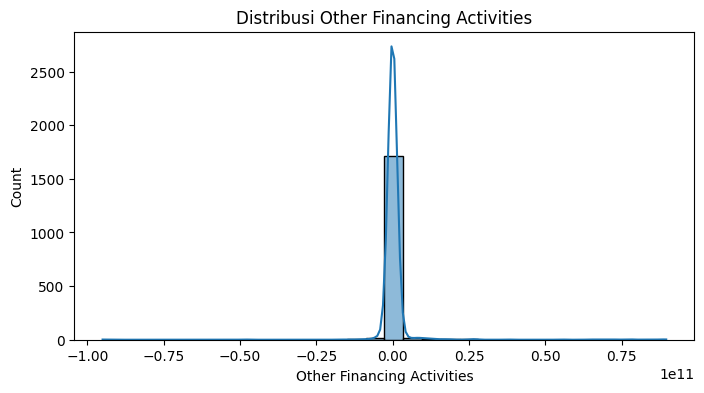

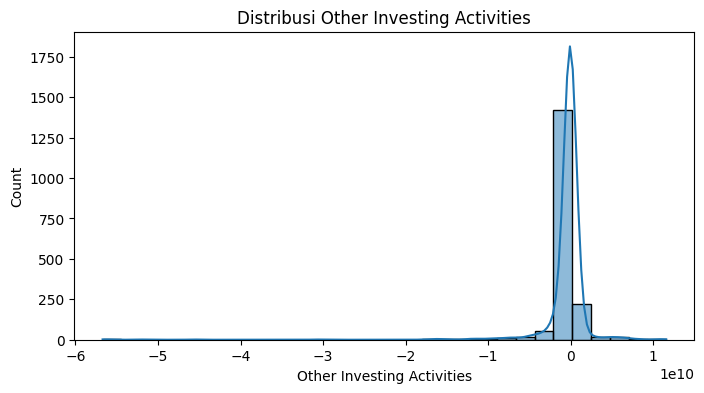

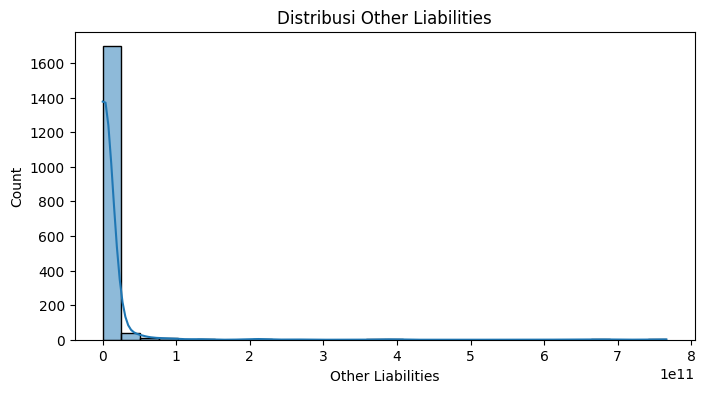

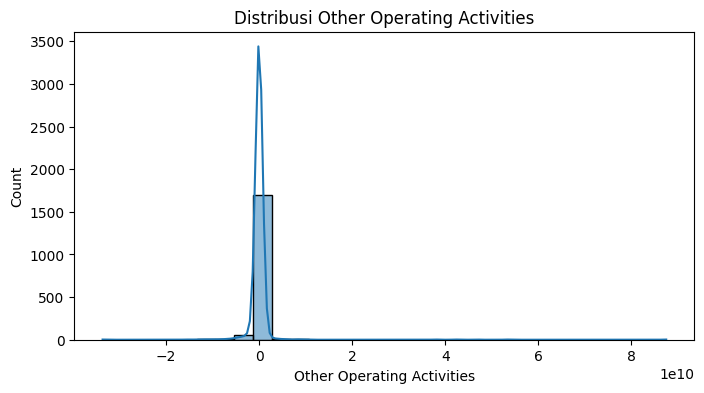

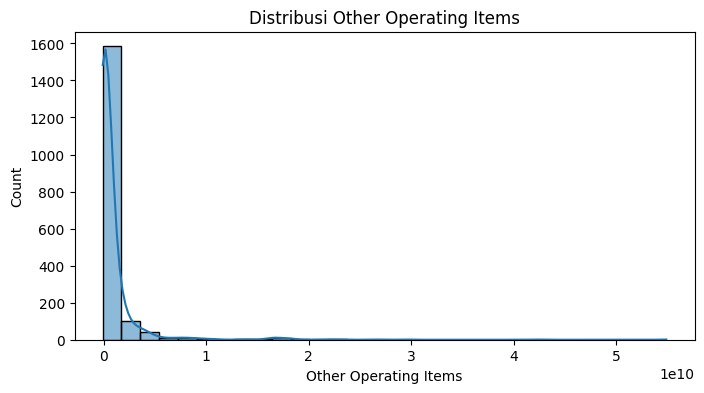

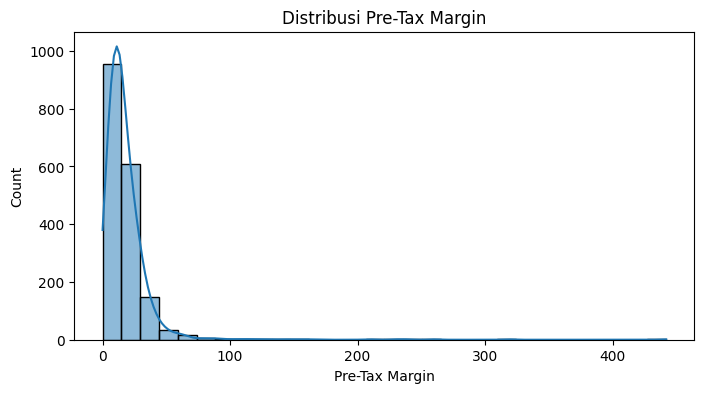

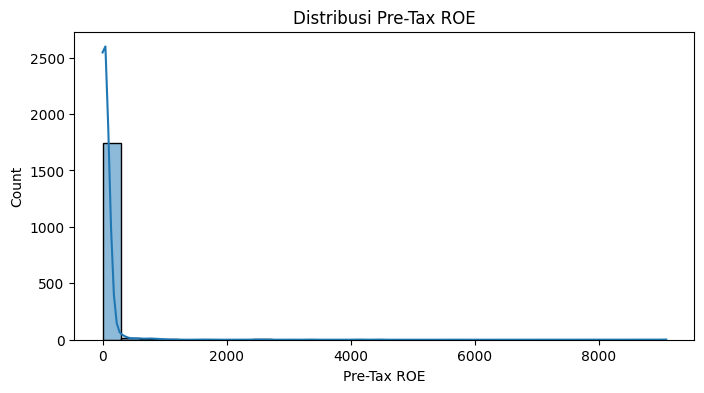

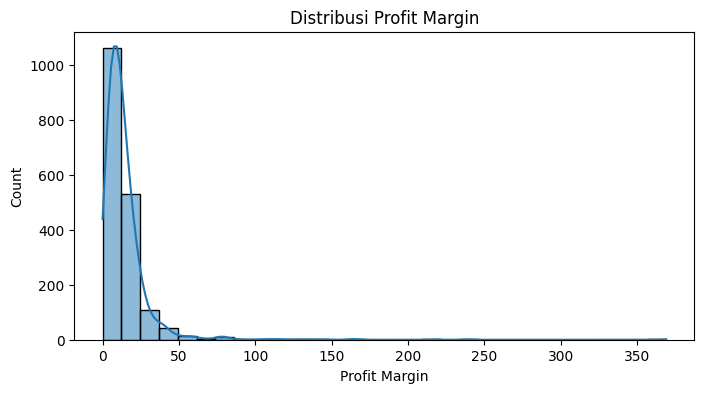

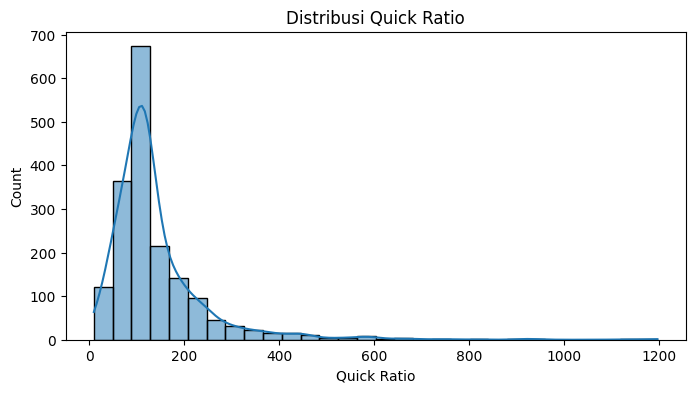

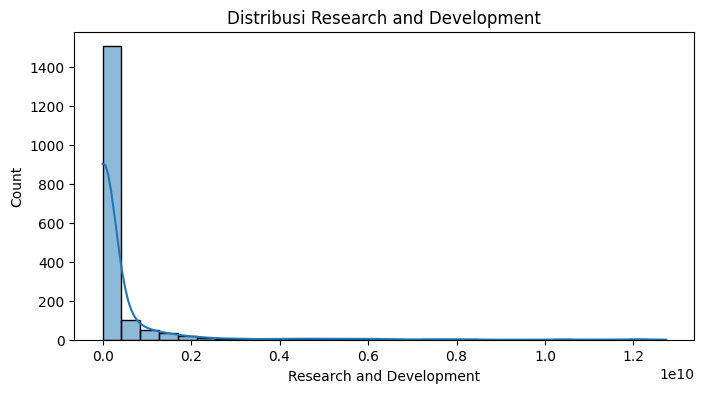

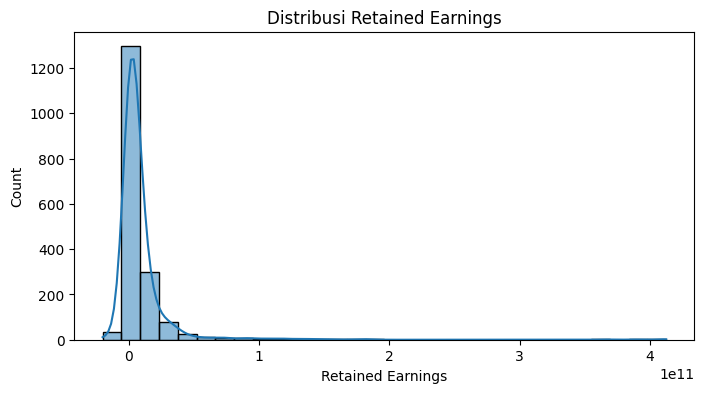

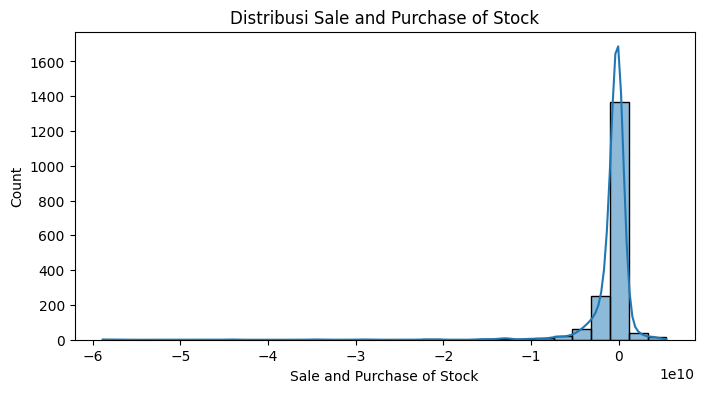

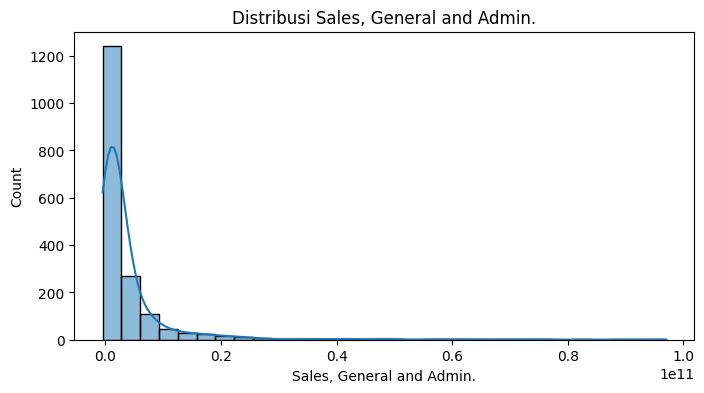

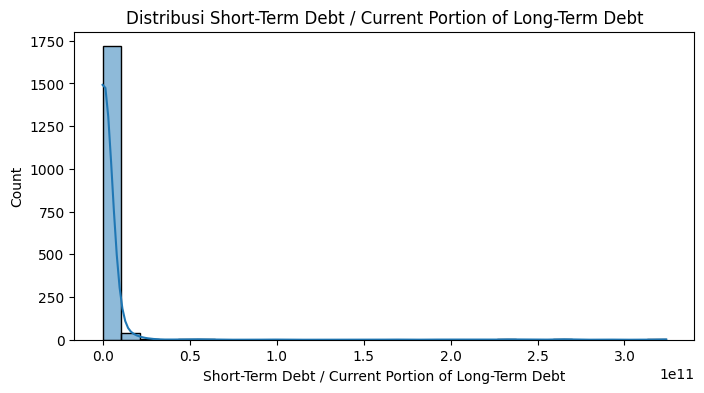

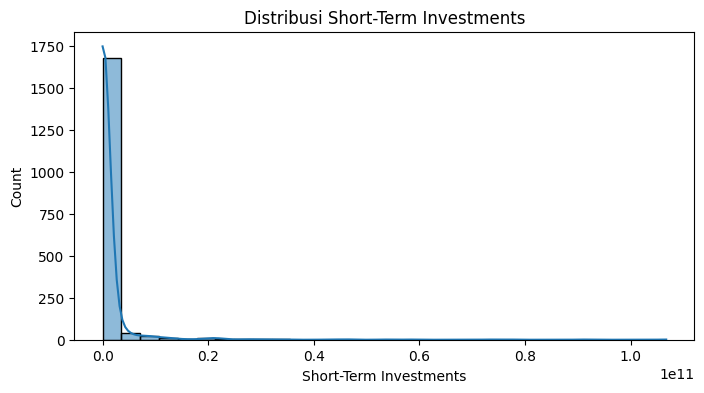

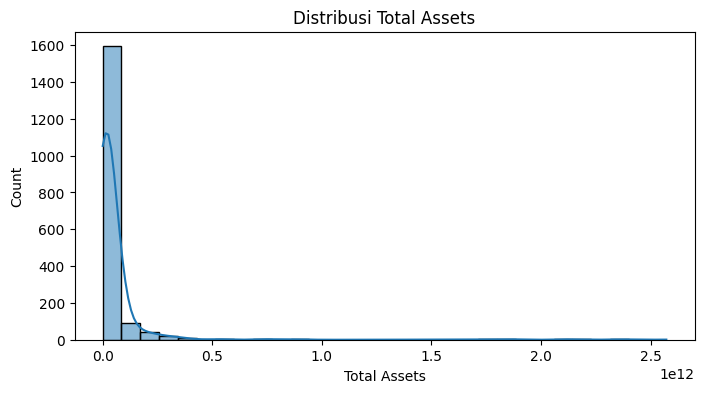

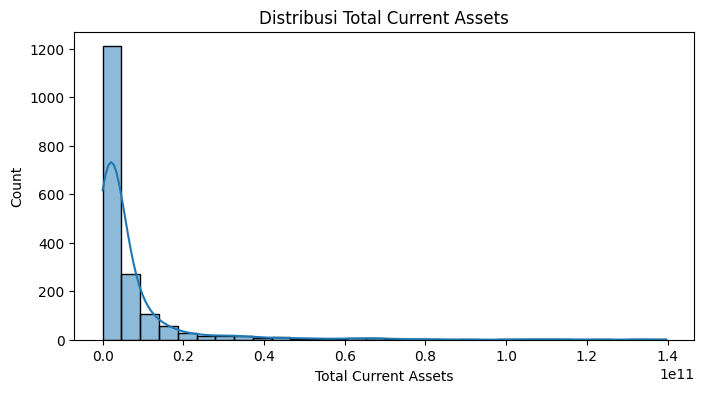

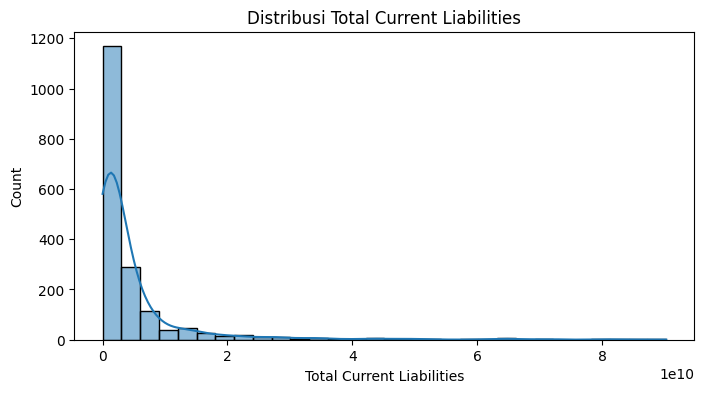

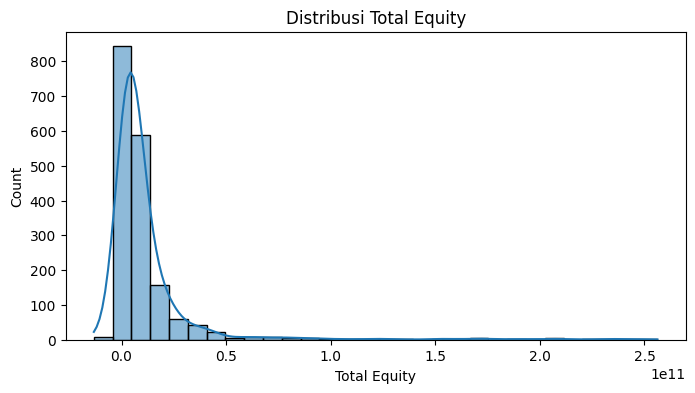

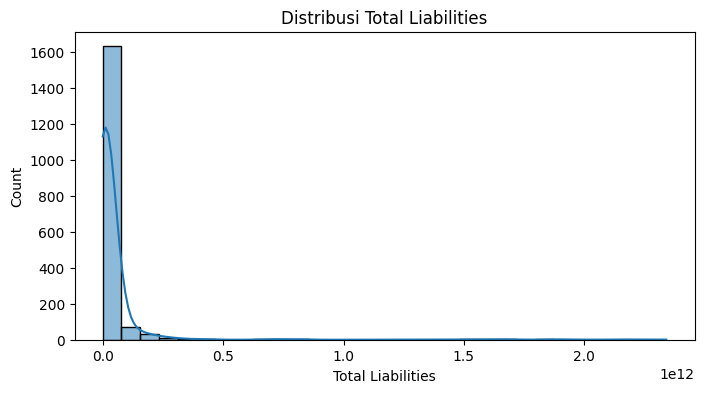

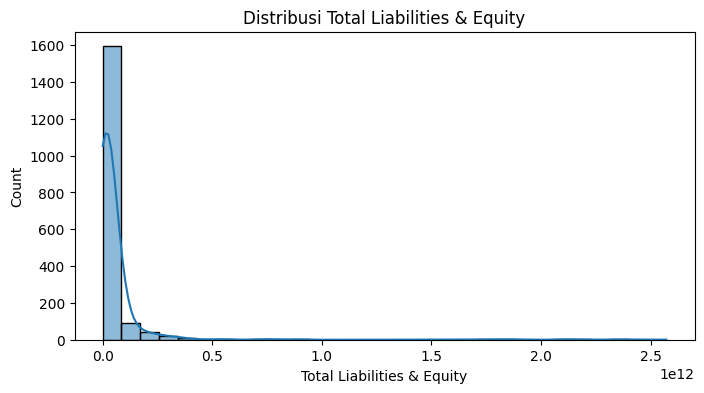

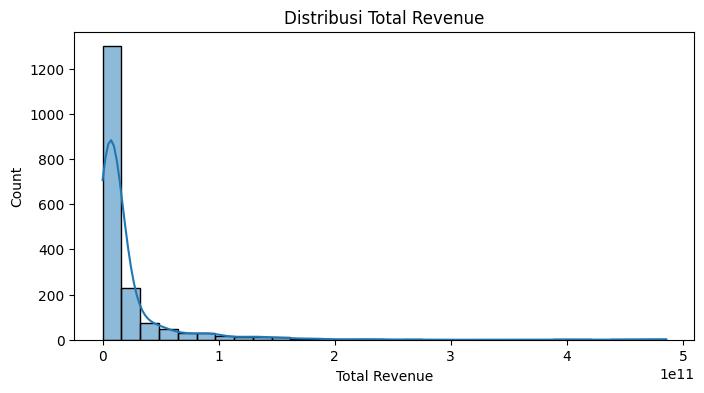

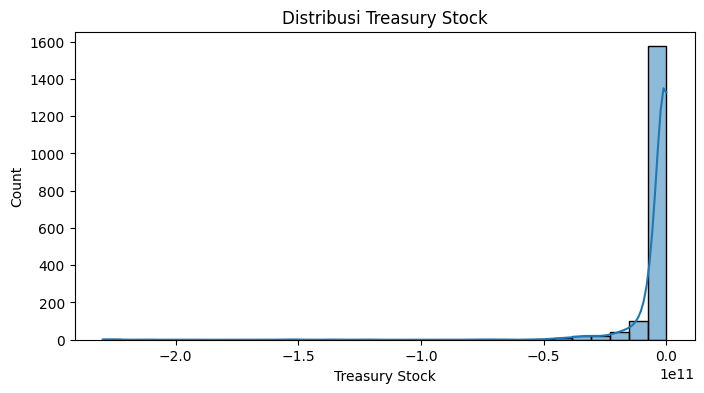

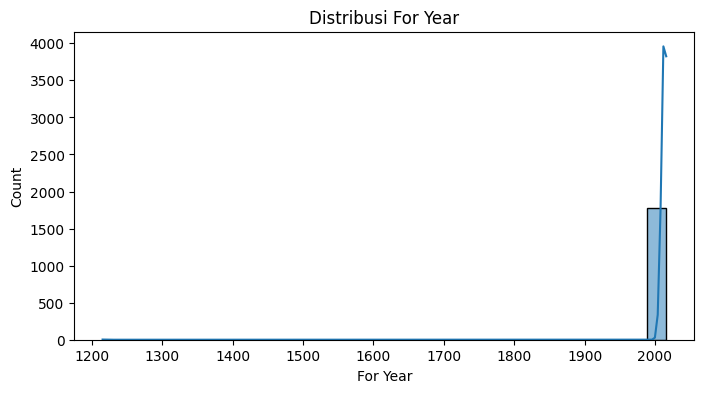

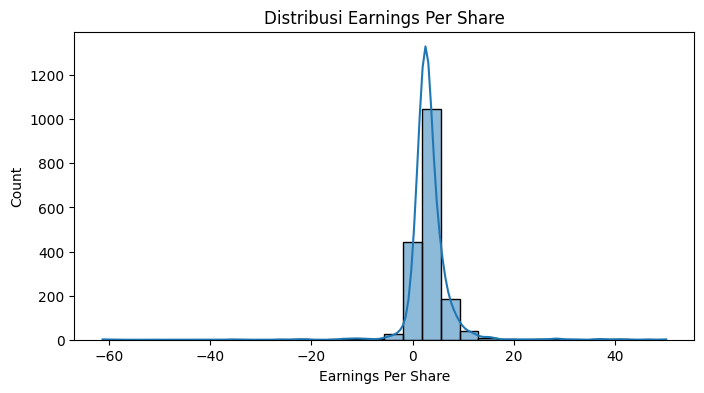

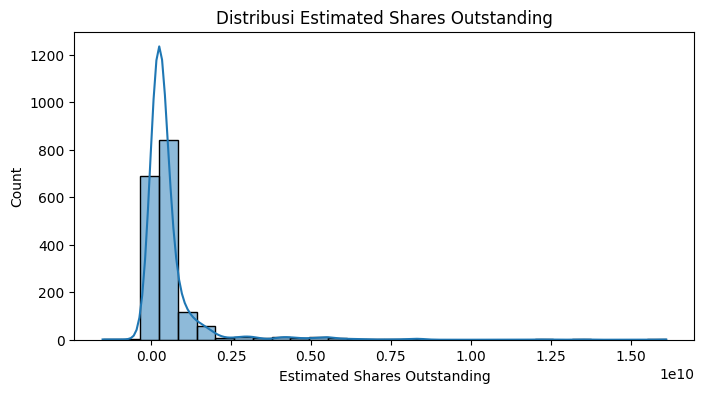

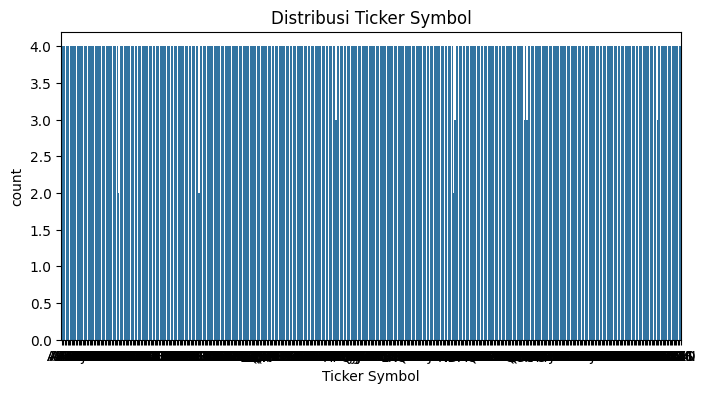

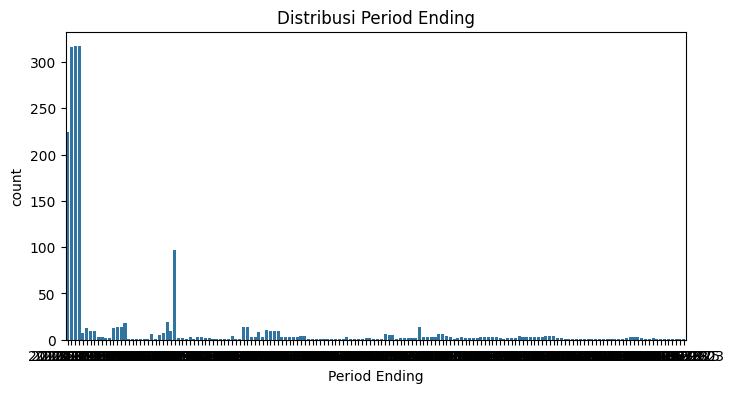

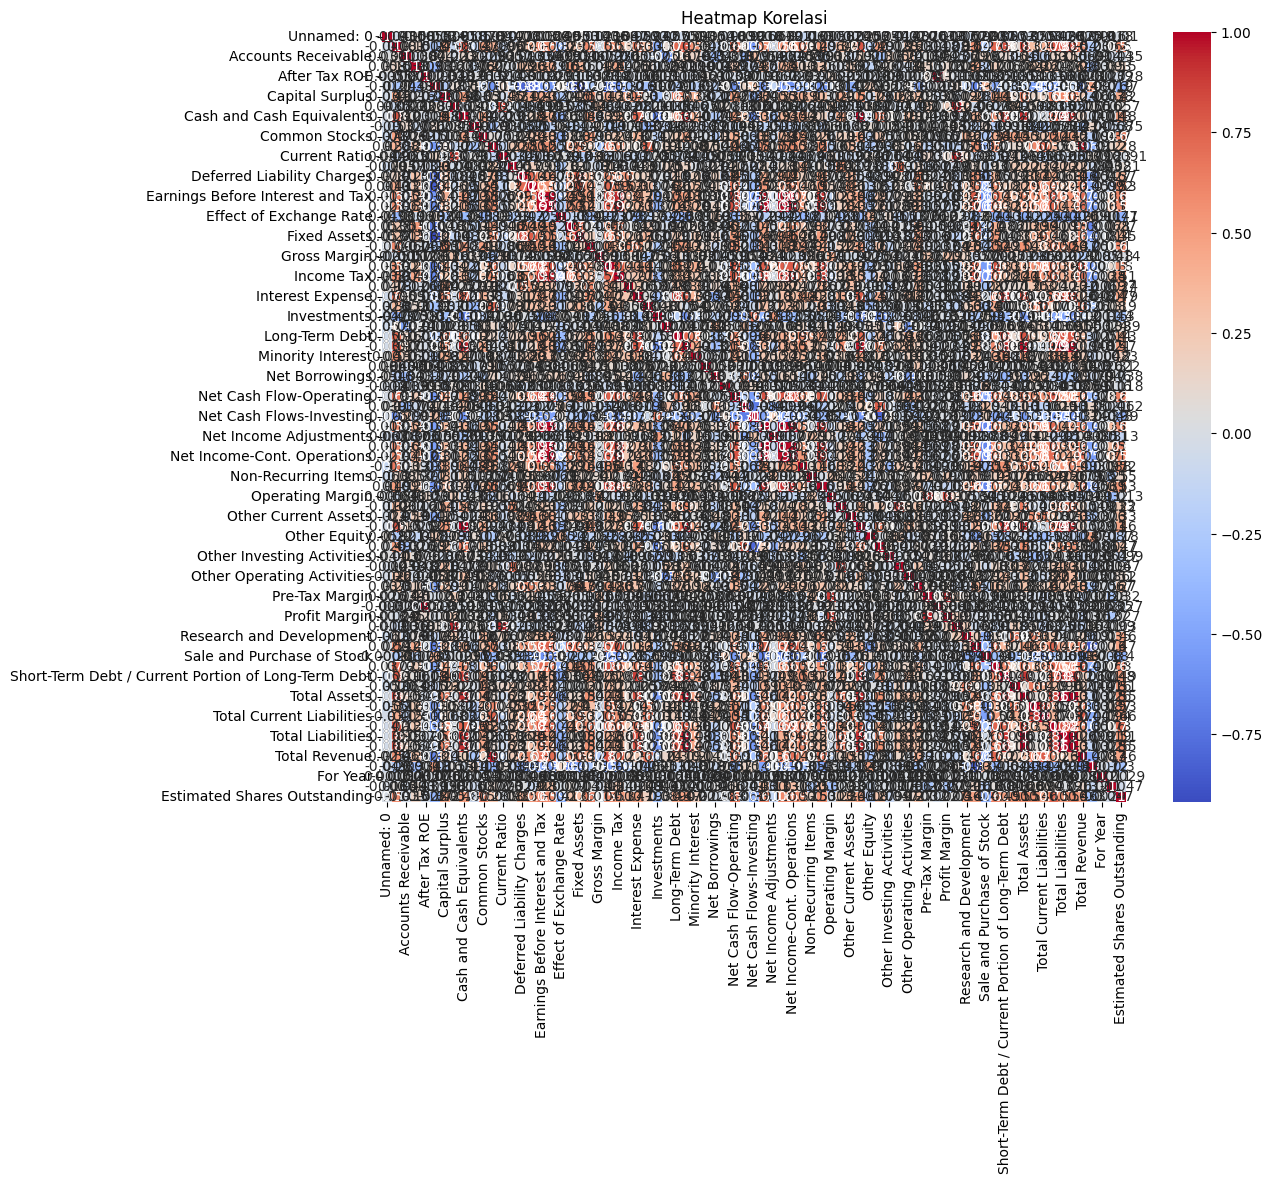

In [ ]:
# Identifikasi Kolom Kategorikal dan Numerikal
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nKolom Kategorikal:", categorical_columns)
print("Kolom Numerikal:", numerical_columns)

# Visualisasi Distribusi Variabel Numerikal
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.show()

# Visualisasi Distribusi Variabel Kategorikal
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col])
    plt.title(f"Distribusi {col}")
    plt.show()

# Matriks Korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

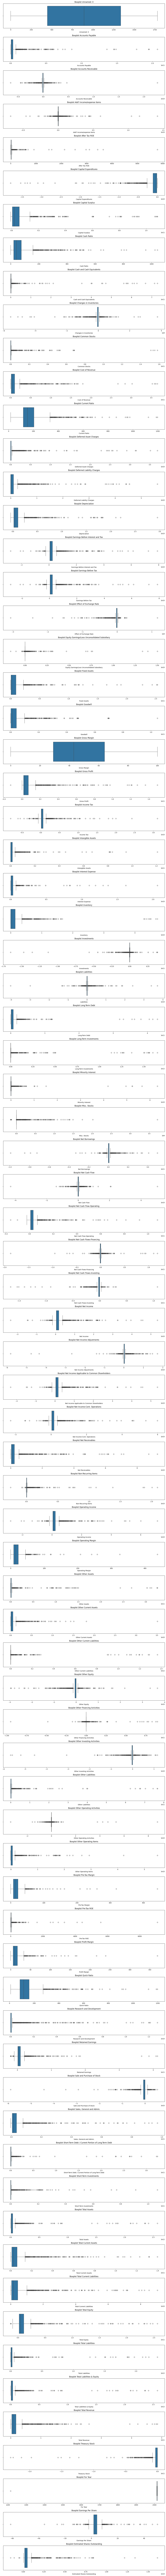

In [ ]:
plt.figure(figsize=(15, len(numerical_columns) * 3))  # Sesuaikan ukuran
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

# **4. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang digunakan sebenernya.

In [ ]:
# Menangani Data Duplikat
initial_shape = data.shape
data.drop_duplicates(inplace=True)
print(f"\nData Duplikat Dihapus: {initial_shape[0] - data.shape[0]} baris")

# Encoding Data Kategorikal
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Normalisasi Data Numerikal
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Menyiapkan Data untuk Clustering
features = categorical_columns + numerical_columns
X = data[features]

# Deteksi dan Penanganan Outlier
# Contoh menggunakan Z-Score
from scipy import stats
z_scores = np.abs(stats.zscore(X))
X = X[(z_scores < 3).all(axis=1)]
print(f"\nData Setelah Menghapus Outliers: {X.shape}")


Data Duplikat Dihapus: 0 baris

Data Setelah Menghapus Outliers: (1401, 79)


# **5. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, saya membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah tahapannya:
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Pembangunan Model Clustering dengan K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # Jumlah cluster awal
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Sinkronisasi dataset utama dengan X
data = data.iloc[X.index].reset_index(drop=True)

# Menambahkan Label Cluster ke Dataset
data['Cluster'] = cluster_labels
print(data['Cluster'].value_counts())

Cluster
0    703
1    698
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, saya akan menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah tahapannya:
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Jumlah Cluster: 2, WCSS: 8566759.73, Silhouette Score: 0.54
Jumlah Cluster: 3, WCSS: 5524642.32, Silhouette Score: 0.43
Jumlah Cluster: 4, WCSS: 4352552.27, Silhouette Score: 0.37
Jumlah Cluster: 5, WCSS: 3740336.70, Silhouette Score: 0.35
Jumlah Cluster: 6, WCSS: 3139103.98, Silhouette Score: 0.36
Jumlah Cluster: 7, WCSS: 2651073.47, Silhouette Score: 0.36
Jumlah Cluster: 8, WCSS: 2197821.96, Silhouette Score: 0.37
Jumlah Cluster: 9, WCSS: 1945638.56, Silhouette Score: 0.36
Jumlah Cluster: 10, WCSS: 1792794.25, Silhouette Score: 0.35


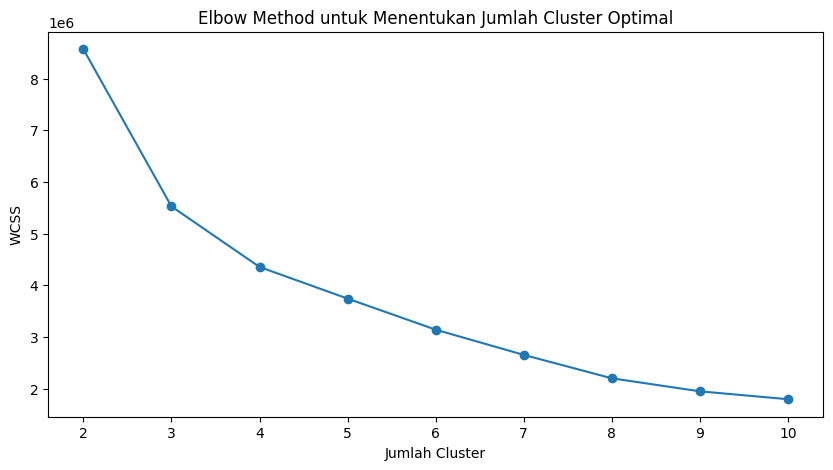

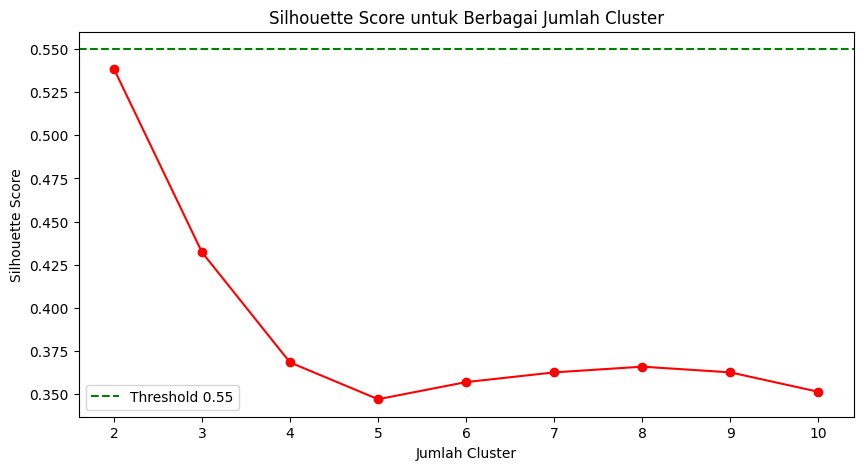


Jumlah Cluster Optimal: 2, Silhouette Score Terbaik: 0.54


In [ ]:
# Evaluasi Jumlah Cluster Optimal dengan Elbow Method dan Silhouette Score
wcss = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {n_clusters}, WCSS: {kmeans.inertia_:.2f}, Silhouette Score: {score:.2f}")

# Visualisasi Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Visualisasi Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.axhline(y=0.55, color='green', linestyle='--', label='Threshold 0.55')
plt.legend()
plt.show()

# Menentukan Jumlah Cluster Optimal
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)
print(f"\nJumlah Cluster Optimal: {optimal_clusters}, Silhouette Score Terbaik: {best_silhouette:.2f}")

# Melatih K-Means dengan Jumlah Cluster Optimal
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans_optimal.fit_predict(X)

## **c. Feature Selection**

Selanjutnya melakukan feature selection karena saya membutuhkan optimasi model clustering. Jika saya menerapkan proses ini, saya akan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Feature Selection dengan SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Intialize StandardScaler
scaler = StandardScaler()

# Scale the features in X and assign to X_scaled
X_scaled = scaler.fit_transform(X)
# Coba variasikan jumlah komponen PCA
best_pca_score = 0
best_n_components = 0

for n_components in range(2, X.shape[1] + 1):  # Uji dari 2 hingga jumlah fitur asli
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)
    cluster_labels_pca = kmeans_pca.fit_predict(X_pca)
    silhouette_pca = silhouette_score(X_pca, cluster_labels_pca)

    if silhouette_pca > best_pca_score:
        best_pca_score = silhouette_pca
        best_n_components = n_components

    print(f"PCA dengan {n_components} Komponen - Silhouette Score: {silhouette_pca:.2f}")

print(f"\nPCA Terbaik: {best_n_components} Komponen dengan Silhouette Score: {best_pca_score:.2f}")

# Gunakan PCA terbaik untuk model final
pca = PCA(n_components=best_n_components)
X_pca_final = pca.fit_transform(X_scaled)

PCA dengan 2 Komponen - Silhouette Score: 0.66
PCA dengan 3 Komponen - Silhouette Score: 0.60
PCA dengan 4 Komponen - Silhouette Score: 0.53
PCA dengan 5 Komponen - Silhouette Score: 0.50
PCA dengan 6 Komponen - Silhouette Score: 0.50
PCA dengan 7 Komponen - Silhouette Score: 0.65
PCA dengan 8 Komponen - Silhouette Score: 0.47
PCA dengan 9 Komponen - Silhouette Score: 0.45
PCA dengan 10 Komponen - Silhouette Score: 0.44
PCA dengan 11 Komponen - Silhouette Score: 0.43
PCA dengan 12 Komponen - Silhouette Score: 0.43
PCA dengan 13 Komponen - Silhouette Score: 0.42
PCA dengan 14 Komponen - Silhouette Score: 0.42
PCA dengan 15 Komponen - Silhouette Score: 0.42
PCA dengan 16 Komponen - Silhouette Score: 0.42
PCA dengan 17 Komponen - Silhouette Score: 0.41
PCA dengan 18 Komponen - Silhouette Score: 0.41
PCA dengan 19 Komponen - Silhouette Score: 0.40
PCA dengan 20 Komponen - Silhouette Score: 0.41
PCA dengan 21 Komponen - Silhouette Score: 0.40
PCA dengan 22 Komponen - Silhouette Score: 0.40


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi. Seperti grafik scatter plot atau 2D PCA projection.

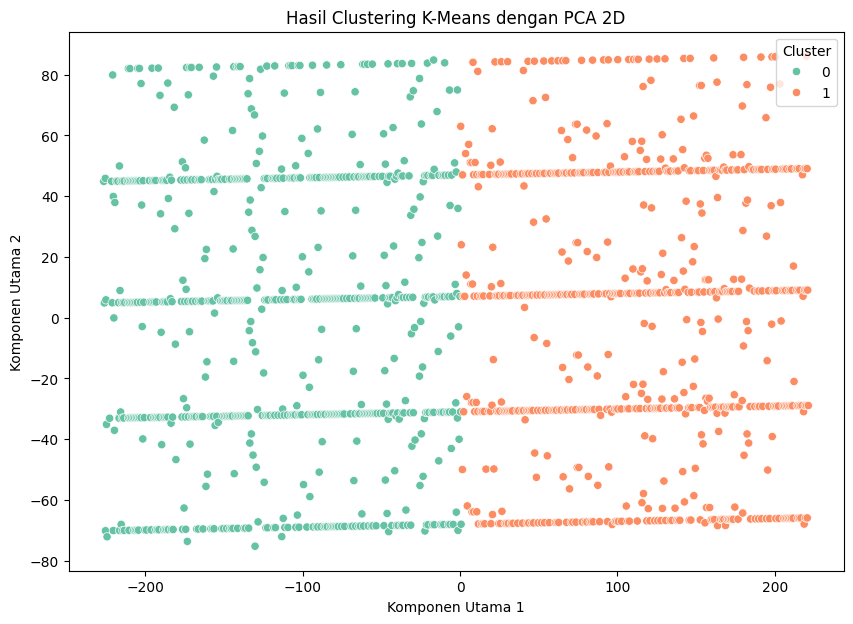

In [ ]:
# Visualisasi Hasil Clustering dengan PCA
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=data['Cluster'], palette='Set2')
plt.title('Hasil Clustering K-Means dengan PCA 2D')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah tahapannya:
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Analisis Karakteristik Setiap Cluster
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster}:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data[features].describe())


Cluster 0:
       Ticker Symbol  Period Ending  Unnamed: 0  Accounts Payable  \
count     703.000000     703.000000  703.000000        703.000000   
mean      115.219061      76.563300   -0.837498         -0.182184   
std        64.475136      45.931091    0.498590          0.222838   
min         0.000000       2.000000   -1.731079         -0.332473   
25%        61.000000      45.000000   -1.259408         -0.298847   
50%       116.000000      83.000000   -0.832474         -0.251848   
75%       169.000000     123.000000   -0.421099         -0.174966   
max       226.000000     161.000000    0.021395          2.400066   

       Accounts Receivable  Add'l income/expense items  After Tax ROE  \
count           703.000000                  703.000000     703.000000   
mean              0.008520                   -0.081900      -0.083939   
std               0.337251                    0.250335       0.207125   
min              -2.838988                   -2.965270      -0.186443   
2

Hasil interpretasinya di atas adalah:

1. Cluster 1: Cluster 0 terdiri dari 703 perusahaan yang cenderung memiliki pendapatan lebih rendah dengan rata-rata total revenue sebesar -0.213 dan laba per saham (earnings per share) yang juga negatif, yaitu -0.040. Selain itu, perusahaan dalam cluster ini memiliki kewajiban utang dagang (accounts payable) yang sedikit negatif, yaitu -0.182, namun piutang dagang (accounts receivable) relatif stabil dengan rata-rata mendekati nol (0.008). Cluster ini juga menunjukkan kecenderungan perusahaan memiliki cadangan saham treasury yang lebih besar, dengan rata-rata sebesar 0.13. Secara keseluruhan, perusahaan dalam cluster ini tampaknya sedang menghadapi tantangan dalam meningkatkan pendapatan dan laba mereka, meskipun kondisi piutang dagang cukup terkendali.
2. Cluster 2: Cluster 1 yang terdiri dari 698 perusahaan menunjukkan karakteristik yang sedikit lebih baik dibandingkan Cluster 0. Perusahaan dalam cluster ini memiliki kewajiban utang dagang yang lebih tinggi dengan rata-rata accounts payable sebesar 0.881 dan piutang dagang yang sedikit lebih tinggi pula dengan rata-rata accounts receivable sebesar 0.046. Pendapatan rata-rata dalam cluster ini (-0.209) sedikit lebih baik dibandingkan Cluster 0, dan laba per saham lebih mendekati nol, yaitu -0.022, menunjukkan kondisi finansial yang sedikit lebih positif. Selain itu, perusahaan dalam cluster ini memiliki saham treasury yang lebih rendah dibandingkan Cluster 0, dengan rata-rata sebesar 0.123.

Secara keseluruhan, perbandingan antara kedua cluster menunjukkan bahwa Cluster 0 merepresentasikan perusahaan dengan pendapatan dan laba yang lebih rendah, sedangkan Cluster 1 terdiri dari perusahaan dengan kewajiban lebih tinggi namun memiliki performa keuangan yang sedikit lebih baik. Perusahaan dalam Cluster 0 dapat difokuskan pada strategi pengurangan biaya dan peningkatan laba, sementara perusahaan dalam Cluster 1 dapat memanfaatkan potensi mereka untuk lebih meningkatkan profitabilitas melalui optimalisasi pendapatan dan pengelolaan kewajiban.

# **6. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Mengeksport Data dengan Label Cluster
output_path = 'fundamentals_clusters.csv'  # Ganti dengan path yang diinginkan
data.to_csv(output_path, index=False)
print(f"\nHasil clustering disimpan ke: {output_path}")


Hasil clustering disimpan ke: fundamentals_clusters.csv
